In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('framingham.csv')
data.head(10)
data = data.dropna()

def normalize_data(x):
    # Normalize data to have mean 0 and standard deviation 1
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x - mean) / std

def normalize_labels(y):
    # Normalize labels to be in the range [0, 1]
    return y / np.max(y)



x_data = data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

y_data = data[['TenYearCHD']]

nrows = int(0.75*data.shape[0])

x_train = x_data[:nrows].to_numpy()

x_test = x_data[nrows:].to_numpy()

y_train = y_data[:nrows].to_numpy()
y_test = y_data[nrows:].to_numpy()

x_train = normalize_data(x_train)
x_test = normalize_data(x_test)


def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return 1/(1+np.exp(-x))*(1-1/(1+np.exp(-x)))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def reLU(x):
    return np.maximum(x,0)

def reLU_derivative(x):
    return np.heaviside(x,1)

x_train.shape

(2742, 15)

In [3]:
#eda
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Correlation

In [4]:
data.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024387,0.017677,0.206778,0.331243,-0.052128,-0.002308,0.000806,0.013833,-0.070229,-0.045484,0.051575,0.072867,-0.114923,0.003048,0.091745
age,-0.024387,1.000000,-0.158961,-0.210862,-0.189099,0.134670,0.050864,0.306693,0.109027,0.267764,0.388551,0.208880,0.137172,-0.002685,0.118245,0.233810
education,0.017677,-0.158961,1.000000,0.025253,0.013527,-0.013647,-0.030353,-0.079100,-0.039547,-0.012956,-0.124511,-0.058502,-0.137280,-0.064254,-0.031874,-0.063068
currentSmoker,0.206778,-0.210862,0.025253,1.000000,0.773819,-0.051936,-0.038159,-0.107561,-0.041859,-0.051119,-0.134371,-0.115748,-0.159574,0.050452,-0.053346,0.019176
cigsPerDay,0.331243,-0.189099,0.013527,0.773819,1.000000,-0.046479,-0.036283,-0.069890,-0.036934,-0.030222,-0.094764,-0.056650,-0.086888,0.063549,-0.053803,0.052159
BPMeds,-0.052128,0.134670,-0.013647,-0.051936,-0.046479,1.000000,0.113119,0.263047,0.049051,0.094011,0.271291,0.199750,0.105603,0.012894,0.054210,0.089116
prevalentStroke,-0.002308,0.050864,-0.030353,-0.038159,-0.036283,0.113119,1.000000,0.066098,0.009619,0.012697,0.061080,0.055878,0.036478,-0.017020,0.016051,0.048351
prevalentHyp,0.000806,0.306693,-0.079100,-0.107561,-0.069890,0.263047,0.066098,1.000000,0.080623,0.167074,0.697790,0.617634,0.302917,0.147333,0.087129,0.181556
diabetes,0.013833,0.109027,-0.039547,-0.041859,-0.036934,0.049051,0.009619,0.080623,1.000000,0.048371,0.102574,0.050767,0.088970,0.060996,0.614817,0.093397
totChol,-0.070229,0.267764,-0.012956,-0.051119,-0.030222,0.094011,0.012697,0.167074,0.048371,1.000000,0.220130,0.174986,0.120799,0.093057,0.049749,0.091127


## Training

In [5]:
def trainNN(x_train,y_train,learning_rate = 0.0003,epochs = 100):
     h1_units = 7
     np.random.seed(101)

     w1 = np.random.randn(x_train.shape[1],h1_units)
     b1 = np.random.randn(h1_units)
     w_out = np.random.randn(h1_units,1)
     b_out = np.random.randn(1)

     loss_history = []

     for epoch in range(epochs):
          h1 = reLU(np.dot(x_train,w1) + b1)
          out = sigmoid(np.dot(h1,w_out) +b_out)

          loss = -np.mean(y_train * np.log(out) + (1 - y_train) * np.log(1 - out))

          loss_history.append(loss)

          delta_out = (out-y_train) * sigmoid_derivative(out)
          delta_h1 = np.dot(delta_out, w_out.T) * reLU_derivative(h1)

          
          w_out = w_out - learning_rate * np.dot(h1.T,delta_out)
          b_out = b_out - learning_rate * np.mean(delta_out, axis=0, keepdims=True)

          w1 = w1 - learning_rate*np.dot(x_train.T, delta_h1)
          b1 = b1 - learning_rate * np.mean(delta_h1, axis=0, keepdims=True)


          
     # plt.figure(figsize=(10,6))
     # plt.plot(np.arange(1, len(loss_history)+1),loss_history)
     # plt.title('Average loss by epoch', fontsize = 20)
     # plt.xlabel('Epoch',fontsize=16)
     # plt.ylabel('Loss',fontsize=16)
     # plt.show()      

     return w1, b1, w_out, b_out,loss_history


In [6]:
def trainNNAdagrad(x_train, y_train, learning_rate=0.08, epochs=100):
    h1_units = 7
    np.random.seed(101)

    w1 = np.random.randn(x_train.shape[1], h1_units)
    b1 = np.random.randn(h1_units)
    w_out = np.random.randn(h1_units, 1)
    b_out = np.random.randn(1)

    loss_history = []

    # Initialize adaptive learning rates for each parameter
    adagrad_w1 = np.zeros_like(w1)
    adagrad_b1 = np.zeros_like(b1)
    adagrad_w_out = np.zeros_like(w_out)
    adagrad_b_out = np.zeros_like(b_out)
    epsilon = 1e-8  # Small value to prevent division by zero

    for epoch in range(epochs):
        h1 = reLU(np.dot(x_train, w1) + b1)
        out = sigmoid(np.dot(h1, w_out) + b_out)

        loss = -np.mean(y_train * np.log(out) + (1 - y_train) * np.log(1 - out))
        loss_history.append(loss)

        delta_out = (out - y_train) * sigmoid_derivative(out)
        delta_h1 = np.dot(delta_out, w_out.T) * reLU_derivative(h1)

        # Compute squared gradients for AdaGrad
        adagrad_w_out += np.dot(h1.T, delta_out) ** 2
        adagrad_b_out += np.sum(delta_out ** 2, axis=0)

        adagrad_w1 += np.dot(x_train.T, delta_h1) ** 2
        adagrad_b1 += np.sum(delta_h1 ** 2, axis=0)

        # Update weights with AdaGrad
        w_out -= (learning_rate / (np.sqrt(adagrad_w_out) + epsilon)) * np.dot(h1.T, delta_out)
        b_out -= (learning_rate / (np.sqrt(adagrad_b_out) + epsilon)) * np.sum(delta_out, axis=0)

        w1 -= (learning_rate / (np.sqrt(adagrad_w1) + epsilon)) * np.dot(x_train.T, delta_h1)
        b1 -= (learning_rate / (np.sqrt(adagrad_b1) + epsilon)) * np.sum(delta_h1, axis=0)


    # plt.figure(figsize=(10,6))
    # plt.plot(np.arange(1, len(loss_history)+1),loss_history)
    # plt.title('Average loss by epoch', fontsize = 20)
    # plt.xlabel('Epoch',fontsize=16)
    # plt.ylabel('Loss',fontsize=16)
    # plt.show()      

    return w1, b1, w_out, b_out,loss_history




C:\Users\jvkum\AppData\Local\Temp\ipykernel_33472\3345080996.py:16: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_train * np.log(out) + (1 - y_train) * np.log(1 - out))
C:\Users\jvkum\AppData\Local\Temp\ipykernel_33472\1267847963.py:23: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_train * np.log(out) + (1 - y_train) * np.log(1 - out))


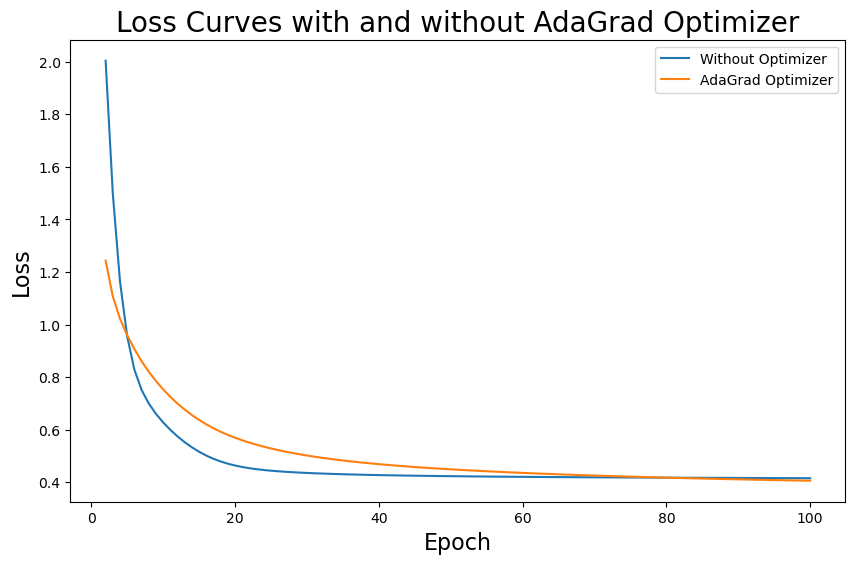

In [7]:
w1, b1, w_out, b_out,loss_history = trainNN(x_train, y_train)
w1_adagrad, b1_adagrad, w_out_adagrad, b_out_adagrad,loss_history_adagrad = trainNNAdagrad(x_train, y_train)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(loss_history) + 1), loss_history, label='Without Optimizer')
plt.plot(np.arange(1, len(loss_history_adagrad) + 1), loss_history_adagrad, label='AdaGrad Optimizer')

plt.title('Loss Curves with and without AdaGrad Optimizer', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend()
plt.show()

In [8]:
def testNN(x_test, w1, b1, w_out, b_out, threshold=0.48):
    # Calculate predictions
    z1 = reLU(np.dot(x_test, w1) + b1)
    y_pred = sigmoid(np.dot(z1, w_out) + b_out)

    # Apply threshold for binary classification
    binary_predictions = (y_pred >= threshold).astype(int)

    return binary_predictions

In [9]:
def testNNAdagrad(w1_adagrad, b1_adagrad, w_out_adagrad, b_out_adagrad, threshold=0.48):
    # Calculate predictions
    z1 = reLU(np.dot(x_test, w1_adagrad) + b1_adagrad)
    y_pred = sigmoid(np.dot(z1, w_out_adagrad) + b_out_adagrad)

    # Apply threshold for binary classification
    binary_predictions = (y_pred >= threshold).astype(int)

    return binary_predictions

In [10]:
predictions = testNN(x_test,w1,b1,w_out,b_out)


In [11]:
predictionsAdagrad = testNNAdagrad(w1_adagrad, b1_adagrad, w_out_adagrad, b_out_adagrad)

Text(0.5, 1.0, 'Confusion matrix without Adagrad')

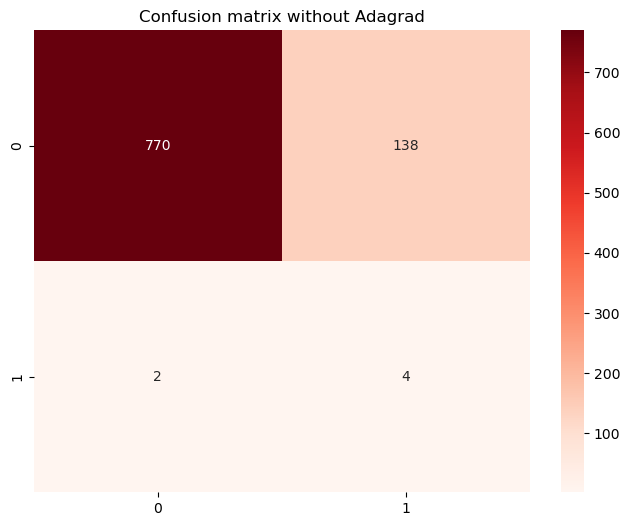

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(predictions,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix without Adagrad')

Text(0.5, 1.0, 'Confusion matrix for Adagrad')

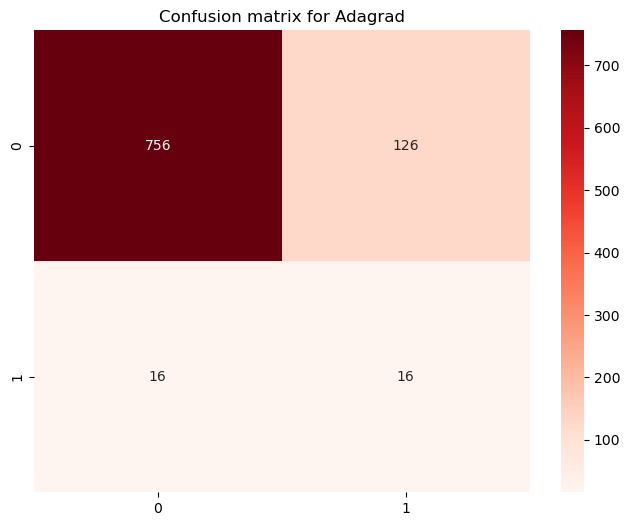

In [13]:
cm = confusion_matrix(predictionsAdagrad,y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix for Adagrad')

In [14]:
accuracy_score(y_test,predictions)

0.8468271334792122

In [15]:
accuracy_score(y_test,predictionsAdagrad)

0.8446389496717724

In [16]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1_score:.2f}")


Precision: 0.67, Recall: 0.03, F1-score: 0.05


In [17]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictionsAdagrad, average='binary')

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1_score:.2f}")

Precision: 0.50, Recall: 0.11, F1-score: 0.18
